In [1]:
from SupportVectorMachine import SVM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from OneVsRestClassifier import OneVsRestClassifier
from sklearn.datasets import make_blobs

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('deep'))

In [3]:
X, y = make_blobs(
    n_samples=60,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    random_state=0
)

<AxesSubplot: >

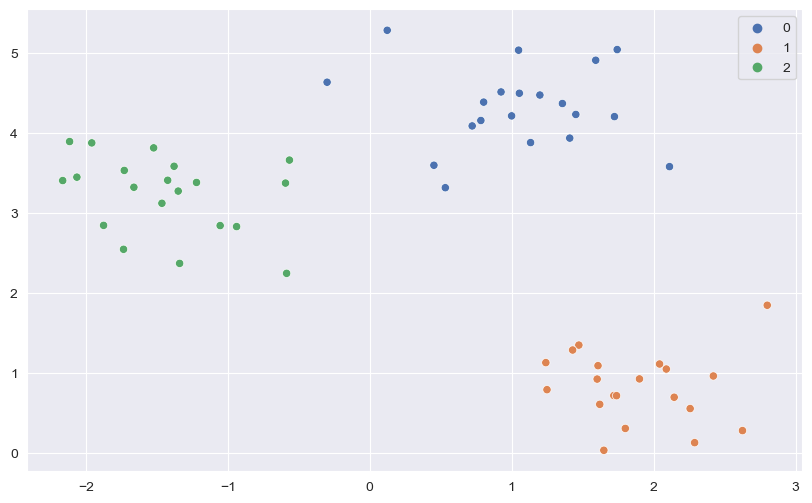

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(y))

In [5]:
ovr_clf = OneVsRestClassifier(SVM, 3, C=1e5, kernel='poly', c=1, q=4)
ovr_clf.fit(X, y)

<AxesSubplot: >

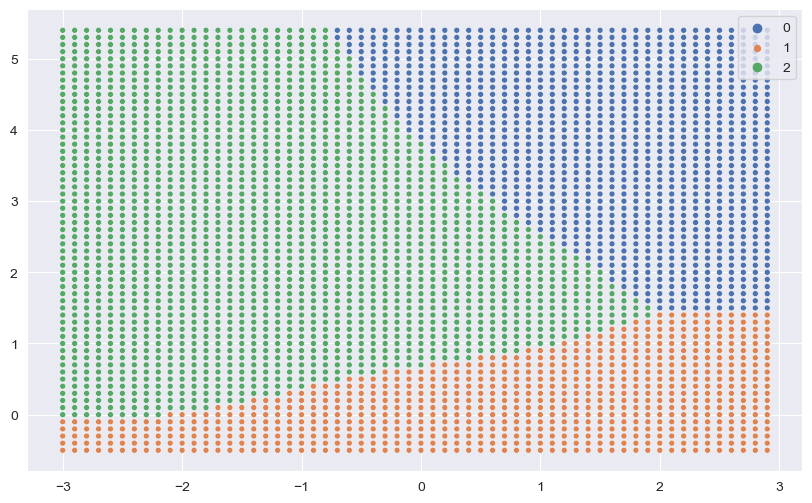

In [6]:
xx, yy = np.mgrid[-3:3:.1, -0.5:5.5:.1]
xx, yy = xx.reshape(xx.shape[0] ** 2), yy.reshape(yy.shape[0] ** 2)
classes = np.array([
    ovr_clf.predict(np.array([x, y])) for x, y in zip(xx, yy)
]).reshape(xx.shape)

sns.scatterplot(x=xx, y=yy, hue=pd.Categorical(classes), size=1)
# sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pd.Categorical(y))

In [7]:
ovr_clf.predict([2, .4])

1